In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("diabetes.csv")
print(df)
df.info()
df.describe()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   31        0  
2       0.672   32   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Проверка на то, что в наборе данных нет пропусков:

In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)

train_x = train.drop('Outcome', axis=1)
train_y = train['Outcome']
test_x = test.drop('Outcome', axis=1)
test_y = test['Outcome']

Нормируем:

In [ ]:
mins = train_x.min();
maxs = train_x.max();

train_x_norm = (train_x - mins) / (maxs - mins)

train_x_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.255019,0.614062,0.603747,0.205738,0.109378,0.477800,0.168524,0.243422
std,0.225456,0.164181,0.179771,0.162943,0.156797,0.122881,0.143230,0.231361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.503807,0.543860,0.000000,0.000000,0.410209,0.068318,0.058824
50%,0.200000,0.593909,0.631579,0.232323,0.040995,0.482861,0.122758,0.156863
75%,0.400000,0.720812,0.701754,0.323232,0.174059,0.546572,0.238792,0.392157
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_x_norm = (test_x - mins) / (maxs - mins)
test_x_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.259420,0.612779,0.611899,0.211419,0.102297,0.474425,0.167375,0.232055
std,0.223174,0.158154,0.143958,0.157096,0.150582,0.104039,0.137578,0.229089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002989,0.000000
25%,0.066667,0.502538,0.561404,0.000000,0.000000,0.397168,0.076003,0.058824
50%,0.200000,0.598985,0.614035,0.232323,0.039651,0.470939,0.130871,0.137255
75%,0.400000,0.699239,0.701754,0.333333,0.169019,0.533532,0.229078,0.372549
max,1.133333,1.010152,1.070175,0.515152,1.137097,0.788376,0.943638,1.176471


In [ ]:
test_x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,3.891304,120.717391,69.756522,20.930435,76.108696,31.833913,0.469991,32.834783
std,3.347607,31.156362,16.411249,15.552543,112.032986,6.981040,0.322208,11.683550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.650000,0.256000,24.000000
50%,3.000000,118.000000,70.000000,23.000000,29.500000,31.600000,0.384500,28.000000
75%,6.000000,137.750000,80.000000,33.000000,125.750000,35.800000,0.614500,40.000000
max,17.000000,199.000000,122.000000,51.000000,846.000000,52.900000,2.288000,81.000000


Реализация KNN:

In [ ]:
class KNN():
  def __init__(self, k):
    self.k = k

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

  def fit(self, x, y):
    self.x_train = np.array(x)
    self.y_train = np.array(y)

  def predict(self, X):
    predictions = [self._predict(x) for x in np.array(X)]
    return predictions

  def _predict(self, x):
    distances = [self.euclidean_distance(x, x_train) for x_train in self.x_train]

    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    vals, counts = np.unique(k_nearest_labels, return_counts=True)
    index = np.argmax(counts)

    return vals[index]

Случайный выбор признака:

Признаки:  ['Pedigree' 'BloodPressure' 'SkinThickness']
Accuracy: 0.6217391304347826


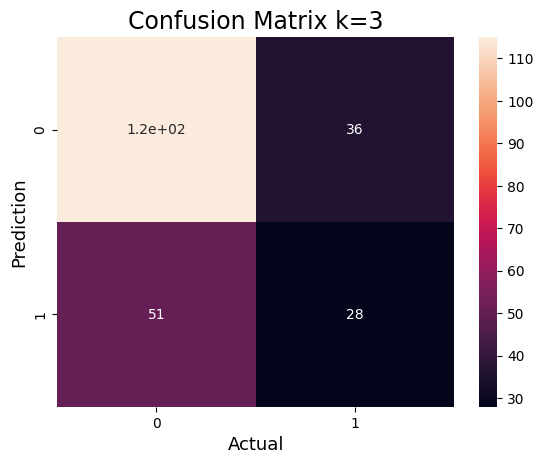

Accuracy: 0.6347826086956522


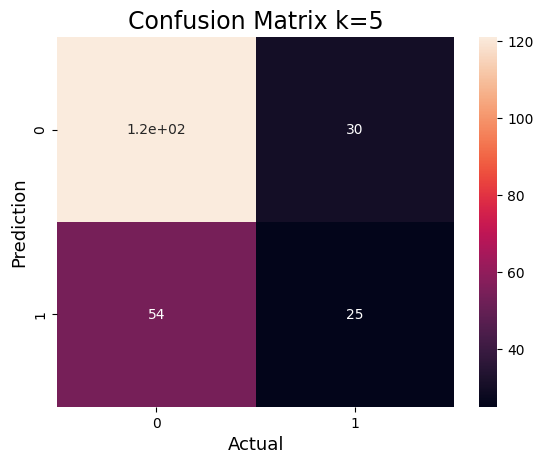

Accuracy: 0.6391304347826087


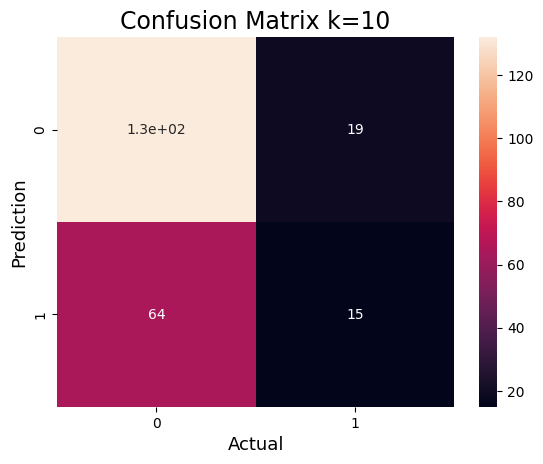

In [ ]:
col_names = np.random.choice(train_x.columns, size=np.random.randint(1, len(train_x.columns)), replace=False)
print("Признаки: ", col_names)
for k in [3, 5, 10]:
  model = KNN(k)
  model.fit(train_x[col_names], train_y)
  y_pred = model.predict(test_x[col_names])

  acc = np.sum(y_pred == test_y) / len(test_y)
  print(f'Accuracy: {acc}')

  cm = confusion_matrix(test_y, y_pred)
  sn.heatmap(cm, annot=True)
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title(f'Confusion Matrix k={k}',fontsize=17)
  plt.show()

Фиксированный набор признаков:

Accuracy: 0.7


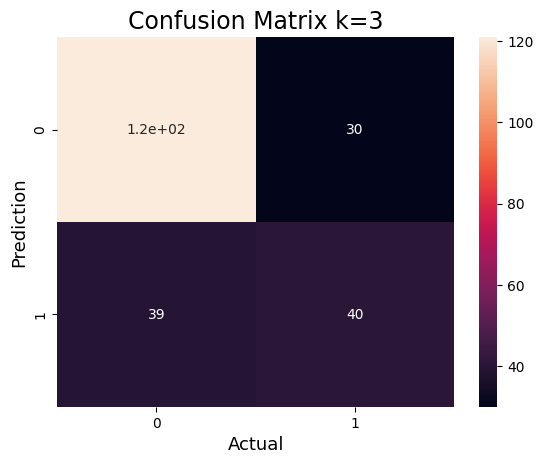

Accuracy: 0.7130434782608696


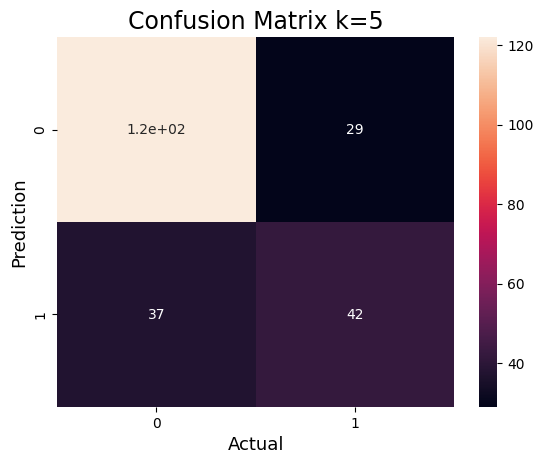

Accuracy: 0.7347826086956522


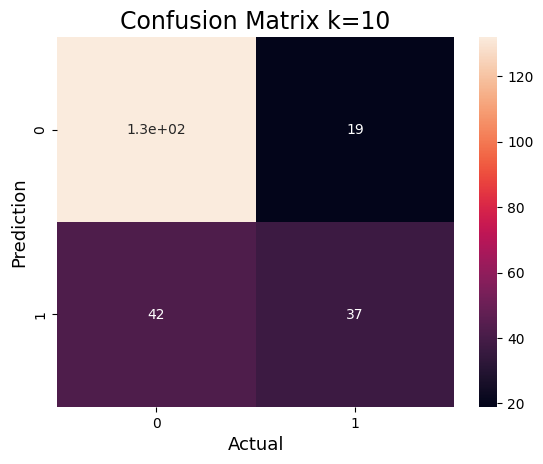

In [ ]:
for k in [3, 5, 10]:
  model = KNN(k)
  model.fit(train_x, train_y)
  y_pred = model.predict(test_x)

  acc = np.sum(y_pred == test_y) / len(test_y)
  print(f'Accuracy: {acc}')
  cm = confusion_matrix(test_y, y_pred)
  sn.heatmap(cm, annot=True)
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title(f'Confusion Matrix k={k}',fontsize=17)
  plt.show()